In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Go one folder up from current working directory (where the notebook/script is)
data_path = Path('..') / 'data' / '20251010_Schilthorn_HIM_3A_CS_RI_IMU Kopie.csv'

print(data_path.resolve())  # full absolute path for sanity check
print('Exists:', data_path.exists())

df = pd.read_csv(data_path)
print(f'Datensatz geladen: {len(df):,} Zeilen')
df.head()

C:\Users\ruegg\OneDrive - FH Graubünden\5. Semester\CDS im Spitzensport\Projekt\data\20251010_Schilthorn_HIM_3A_CS_RI_IMU Kopie.csv
Exists: True
Datensatz geladen: 3,443,767 Zeilen


,imuTimestamp [us],accX [g],accY [g],accZ [g],gyrX [dps],gyrY [dps],gyrZ [dps]
0,845000,0.004392,-0.060024,-0.450424,-29.12,44.94,-94.22
1,850000,0.042944,-0.161040,-1.010160,8.40,-6.86,-19.32
2,855000,0.047336,-0.188856,-1.040904,39.06,-90.44,-51.66
3,860000,0.046848,-0.208376,-1.043832,20.86,-58.24,-70.84
4,865000,0.048312,-0.257176,-1.052616,86.24,-108.50,-26.04


In [12]:
df

,imuTimestamp [us],accX [g],accY [g],accZ [g],gyrX [dps],gyrY [dps],gyrZ [dps]
0,845000,0.004392,-0.060024,-0.450424,-29.12,44.94,-94.22
1,850000,0.042944,-0.161040,-1.010160,8.40,-6.86,-19.32
2,855000,0.047336,-0.188856,-1.040904,39.06,-90.44,-51.66
3,860000,0.046848,-0.208376,-1.043832,20.86,-58.24,-70.84
4,865000,0.048312,-0.257176,-1.052616,86.24,-108.50,-26.04
...,...,...,...,...,...,...,...
3443762,17226324250,-0.239120,-0.029280,-1.077992,15.26,69.30,16.38
3443763,17226329250,-0.244976,-0.046360,-1.076040,9.38,74.62,21.14
3443764,17226334250,-0.241560,-0.042944,-1.052128,5.18,79.94,30.52
3443765,17226339250,-0.218136,-0.040016,-1.068232,0.70,81.48,36.40


In [13]:
# Zeit normalisieren
df["t"] = df["imuTimestamp [us]"] * 1e-6
df = df.sort_values("t")


In [14]:
df

,imuTimestamp [us],accX [g],accY [g],accZ [g],gyrX [dps],gyrY [dps],gyrZ [dps],t
0,845000,0.004392,-0.060024,-0.450424,-29.12,44.94,-94.22,0.84500
1,850000,0.042944,-0.161040,-1.010160,8.40,-6.86,-19.32,0.85000
2,855000,0.047336,-0.188856,-1.040904,39.06,-90.44,-51.66,0.85500
3,860000,0.046848,-0.208376,-1.043832,20.86,-58.24,-70.84,0.86000
4,865000,0.048312,-0.257176,-1.052616,86.24,-108.50,-26.04,0.86500
...,...,...,...,...,...,...,...,...
3443762,17226324250,-0.239120,-0.029280,-1.077992,15.26,69.30,16.38,17226.32425
3443763,17226329250,-0.244976,-0.046360,-1.076040,9.38,74.62,21.14,17226.32925
3443764,17226334250,-0.241560,-0.042944,-1.052128,5.18,79.94,30.52,17226.33425
3443765,17226339250,-0.218136,-0.040016,-1.068232,0.70,81.48,36.40,17226.33925


In [15]:
# Betrag der Beschleunigung (falls Orientierung nicht perfekt ist)
df["acc_norm"] = np.sqrt(df["accX [g]"]**2 + df["accY [g]"]**2 + df["accZ [g]"]**2)
df

,imuTimestamp [us],accX [g],accY [g],accZ [g],gyrX [dps],gyrY [dps],gyrZ [dps],t,acc_norm
0,845000,0.004392,-0.060024,-0.450424,-29.12,44.94,-94.22,0.84500,0.454427
1,850000,0.042944,-0.161040,-1.010160,8.40,-6.86,-19.32,0.85000,1.023817
2,855000,0.047336,-0.188856,-1.040904,39.06,-90.44,-51.66,0.85500,1.058956
3,860000,0.046848,-0.208376,-1.043832,20.86,-58.24,-70.84,0.86000,1.065458
4,865000,0.048312,-0.257176,-1.052616,86.24,-108.50,-26.04,0.86500,1.084654
...,...,...,...,...,...,...,...,...,...
3443762,17226324250,-0.239120,-0.029280,-1.077992,15.26,69.30,16.38,17226.32425,1.104582
3443763,17226329250,-0.244976,-0.046360,-1.076040,9.38,74.62,21.14,17226.32925,1.104547
3443764,17226334250,-0.241560,-0.042944,-1.052128,5.18,79.94,30.52,17226.33425,1.080356
3443765,17226339250,-0.218136,-0.040016,-1.068232,0.70,81.48,36.40,17226.33925,1.091011


In [16]:
# Takeoff: moderate Peaks
takeoff_idx, _ = find_peaks(df["acc_norm"], height=2.2, distance=200)

# Landing: große Peaks
landing_idx, _ = find_peaks(df["acc_norm"], height=3.5, distance=200)

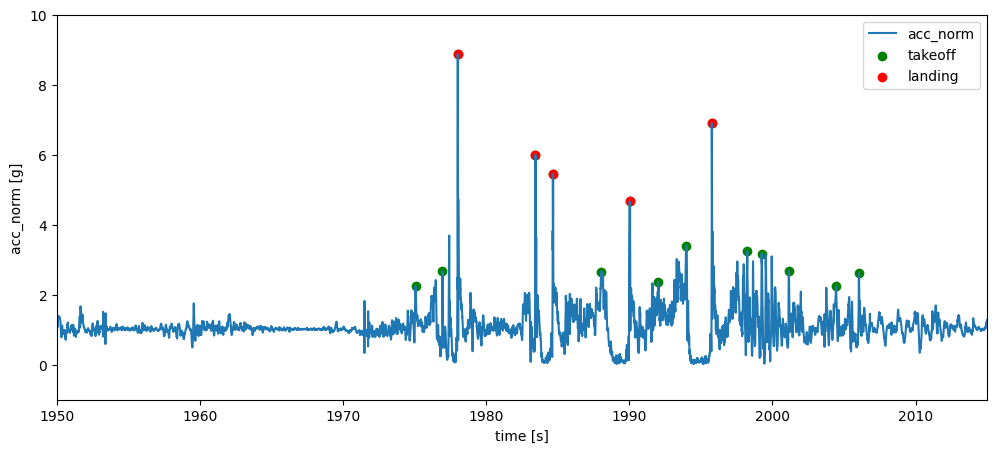

In [17]:
# alles mit coolen punkten darstellen

plt.figure(figsize=(12,5))
plt.plot(df["t"], df["acc_norm"], label="acc_norm")

plt.scatter(df["t"].iloc[takeoff_idx], df["acc_norm"].iloc[takeoff_idx], color="green", label="takeoff")
plt.scatter(df["t"].iloc[landing_idx], df["acc_norm"].iloc[landing_idx], color="red", label="landing")

plt.xlabel("time [s]")
plt.ylabel("acc_norm [g]")
plt.legend()
plt.xlim(1950, 2015)   # <-- Zoombereich
plt.ylim(-1, 10)     # optional
plt.show()

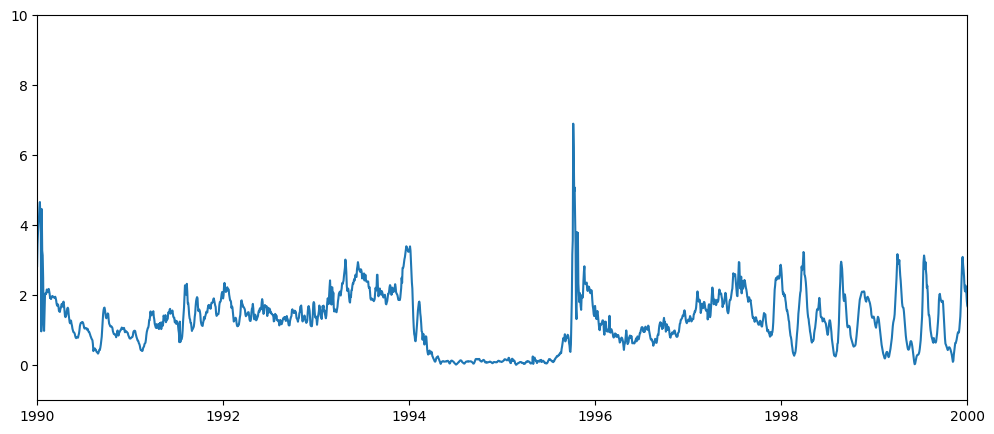

In [18]:
# Nur Sensordaten in Fahrtbereich
# Hier ist Sprung wo er nix macht

plt.figure(figsize=(12,5))
plt.plot(df["t"], df["acc_norm"])

plt.xlim(1990, 2000)   # <-- Zoombereich
plt.ylim(-1, 10)     # optional
plt.show()

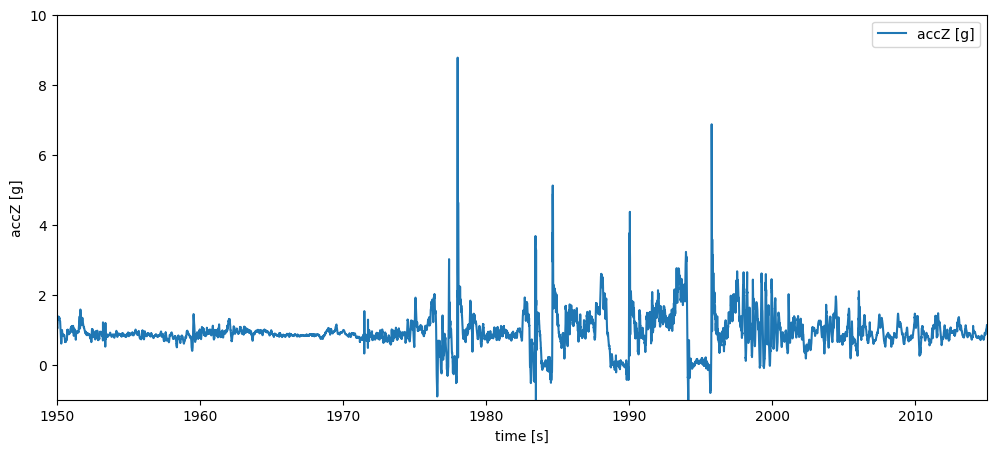

In [19]:
# Nur accZ in Fahrtbereich
plt.figure(figsize=(12,5))
plt.plot(df["t"], df["accZ [g]"], label="accZ [g]")

plt.xlabel("time [s]")
plt.ylabel("accZ [g]")
plt.legend()
plt.xlim(1950, 2015)   # <-- Zoombereich
plt.ylim(-1, 10)     # optional
plt.show()

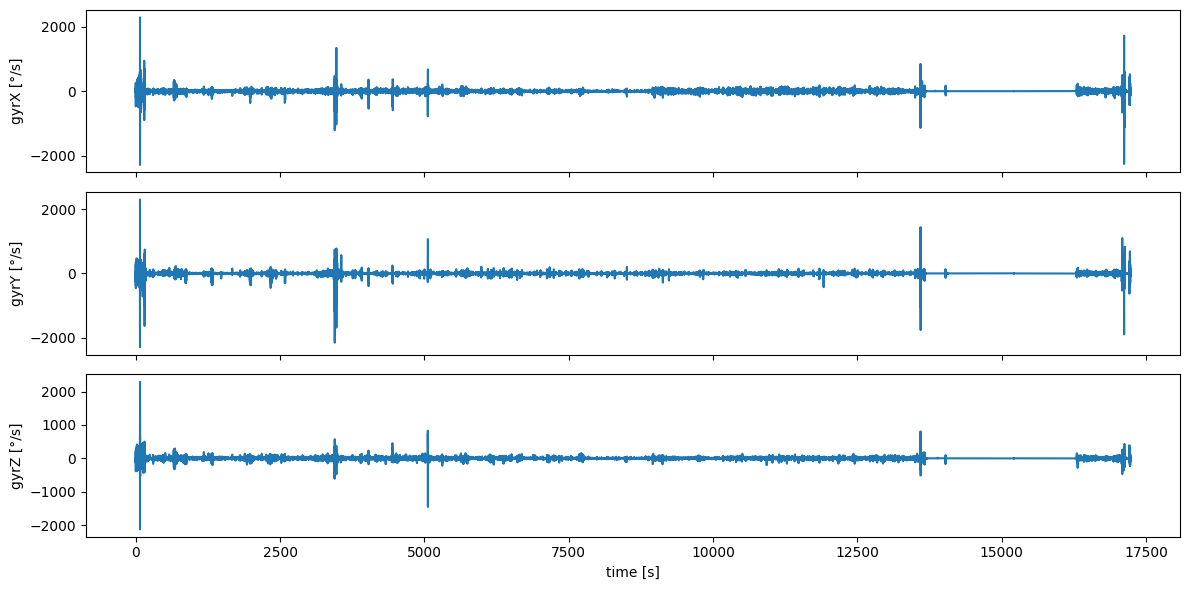

In [20]:
t = df["t"]  # deine Zeitspalte in Sekunden

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 6))

ax[0].plot(t, df["gyrX [dps]"])
ax[0].set_ylabel("gyrX [°/s]")

ax[1].plot(t, df["gyrY [dps]"])
ax[1].set_ylabel("gyrY [°/s]")

ax[2].plot(t, df["gyrZ [dps]"])
ax[2].set_ylabel("gyrZ [°/s]")
ax[2].set_xlabel("time [s]")

plt.tight_layout()
plt.show()

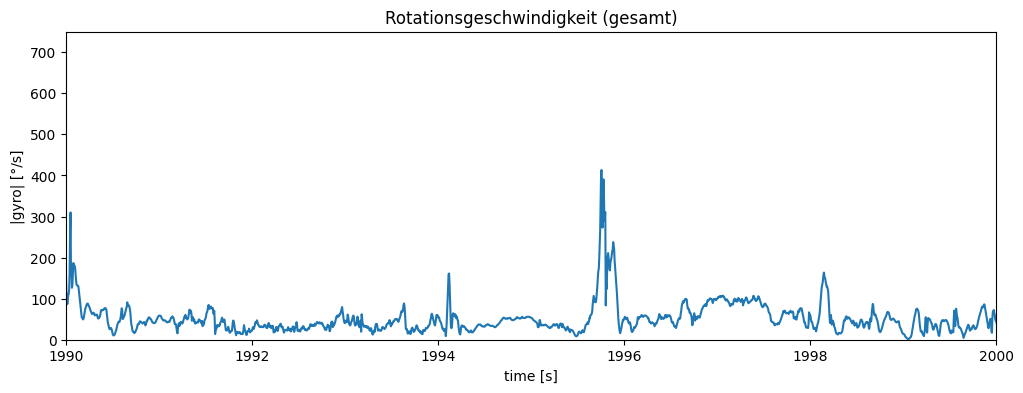

In [21]:
df["gyr_norm"] = np.sqrt(
    df["gyrX [dps]"]**2 +
    df["gyrY [dps]"]**2 +
    df["gyrZ [dps]"]**2
)

plt.figure(figsize=(12, 4))
plt.plot(df["t"], df["gyr_norm"])
plt.xlabel("time [s]")
plt.xlim(1990, 2000)
plt.ylabel("|gyro| [°/s]")
plt.ylim(0, 750)
plt.title("Rotationsgeschwindigkeit (gesamt)")
plt.show()

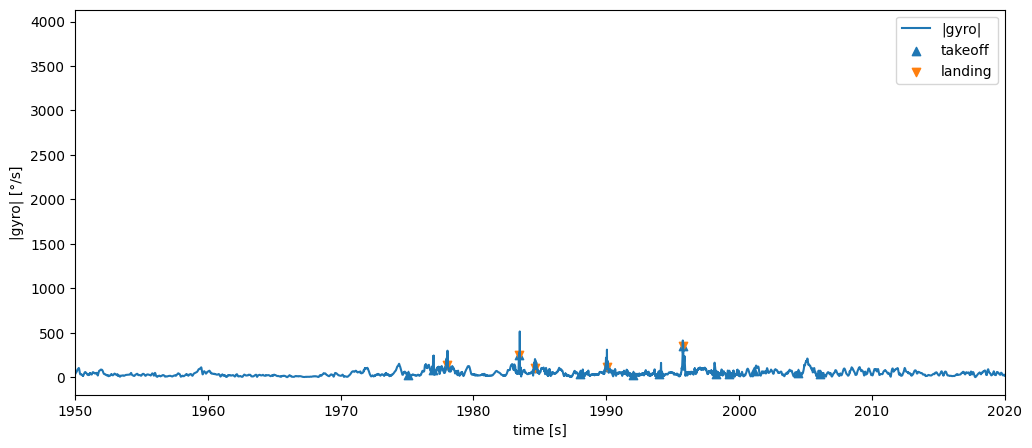

In [22]:
# angenommen: takeoff_idx und landing_idx existieren schon (aus acc-Auswertung)
t = df["t"]

plt.figure(figsize=(12, 5))
plt.plot(t, df["gyr_norm"], label="|gyro|")

plt.scatter(t.iloc[takeoff_idx], df["gyr_norm"].iloc[takeoff_idx],
            label="takeoff", marker="^")
plt.scatter(t.iloc[landing_idx], df["gyr_norm"].iloc[landing_idx],
            label="landing", marker="v")

plt.xlabel("time [s]")
plt.xlim(1950, 2020)
plt.ylabel("|gyro| [°/s]")
plt.legend()
plt.show()

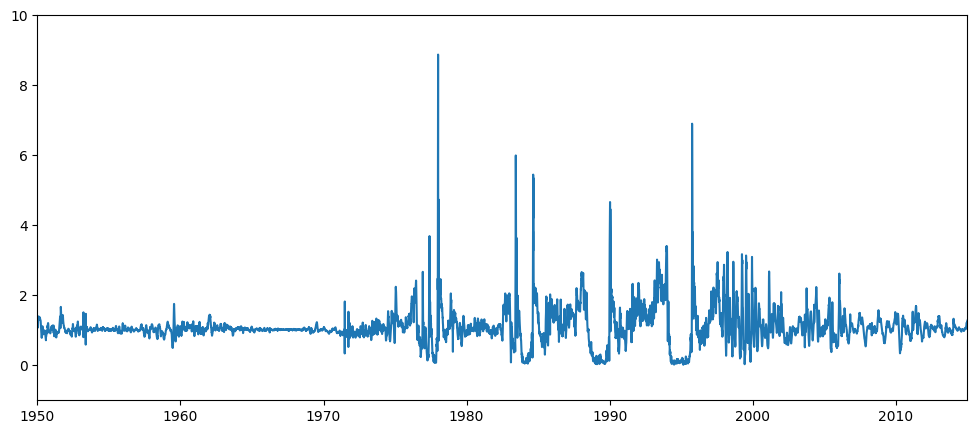

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df["t"], df["acc_norm"])

plt.xlim(1950, 2015)   # <-- Zoombereich
plt.ylim(-1, 10)     # optional
plt.show()

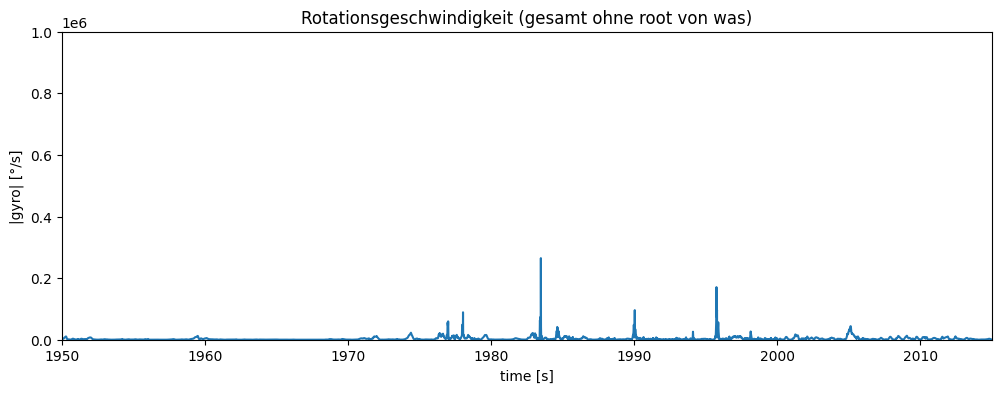

In [24]:
df["gyr_skibidi"] = (
    df["gyrX [dps]"]**2 +
    df["gyrY [dps]"]**2 +
    df["gyrZ [dps]"]**2)

plt.figure(figsize=(12, 4))
plt.plot(df["t"], df["gyr_skibidi"])
plt.xlabel("time [s]")
plt.xlim(1950, 2015)
plt.ylabel("|gyro| [°/s]")
plt.ylim(0, 1000000)
plt.title("Rotationsgeschwindigkeit (gesamt ohne root von was)")
plt.show()